### Implementing OVR in Logistic regression

In [61]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV,StratifiedKFold
from sklearn.datasets import make_classification 
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
x,y = make_classification(n_samples=1000,n_informative=3,n_classes=3,n_features=10,random_state=42)
X = pd.DataFrame(data=x)
y

array([1, 2, 1, 1, 2, 1, 1, 0, 2, 2, 2, 0, 1, 0, 2, 1, 2, 1, 0, 1, 1, 1,
       2, 2, 1, 2, 2, 0, 1, 2, 0, 1, 0, 2, 0, 1, 0, 0, 2, 0, 1, 0, 2, 1,
       2, 0, 2, 0, 2, 0, 0, 0, 2, 1, 1, 1, 1, 2, 0, 0, 2, 1, 0, 0, 1, 2,
       0, 2, 2, 1, 0, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0,
       0, 1, 1, 2, 1, 0, 1, 2, 0, 2, 0, 0, 2, 1, 0, 2, 0, 2, 2, 0, 2, 0,
       0, 0, 0, 2, 1, 2, 1, 0, 2, 0, 0, 2, 1, 0, 2, 1, 0, 0, 2, 2, 0, 0,
       0, 2, 1, 2, 2, 0, 2, 0, 1, 2, 1, 2, 1, 1, 2, 0, 0, 1, 0, 2, 0, 0,
       0, 1, 1, 2, 1, 2, 2, 0, 0, 0, 1, 1, 0, 2, 1, 2, 2, 2, 1, 1, 0, 2,
       1, 0, 2, 1, 2, 1, 2, 0, 1, 1, 0, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2,
       1, 2, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 0, 2, 2, 2, 0,
       2, 0, 1, 1, 2, 1, 2, 2, 2, 2, 0, 1, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1,
       0, 2, 0, 0, 1, 0, 2, 0, 1, 2, 2, 2, 1, 2, 1, 0, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 0, 0, 0, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 0, 0, 2, 2,
       2, 1, 1, 1, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 1,

In [3]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=35)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(700, 10) (300, 10) (700,) (300,)


In [4]:
model_logic = LogisticRegression(multi_class='ovr')

In [5]:
model_logic.fit(x_train,y_train)

p:\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='ovr')

In [6]:
y_pred = model_logic.predict(x_test)
y_pred

array([0, 2, 0, 2, 0, 1, 0, 1, 2, 1, 2, 2, 0, 2, 0, 2, 1, 2, 2, 1, 2, 1,
       0, 0, 0, 1, 0, 0, 1, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 1, 2, 1, 2, 2,
       2, 0, 0, 2, 1, 0, 1, 2, 2, 1, 0, 0, 2, 2, 0, 0, 2, 0, 2, 0, 2, 0,
       2, 1, 2, 0, 1, 0, 2, 2, 2, 0, 2, 2, 0, 2, 1, 2, 2, 1, 2, 0, 2, 2,
       0, 2, 2, 2, 0, 2, 0, 1, 0, 2, 2, 0, 1, 1, 1, 0, 2, 2, 0, 2, 0, 1,
       0, 0, 0, 0, 1, 1, 2, 0, 1, 0, 0, 0, 0, 2, 1, 0, 2, 2, 0, 2, 0, 1,
       0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 1, 1,
       2, 1, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2, 2, 2,
       0, 1, 1, 1, 0, 2, 2, 2, 2, 1, 1, 0, 1, 2, 0, 2, 0, 2, 1, 1, 2, 0,
       0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1, 0, 2, 0, 1, 2, 1, 2,
       0, 0, 0, 2, 0, 2, 0, 2, 1, 0, 2, 2, 2, 2, 2, 1, 1, 0, 2, 0, 0, 2,
       1, 0, 1, 0, 0, 0, 2, 1, 1, 0, 2, 0, 1, 2, 0, 2, 2, 1, 2, 2, 1, 0,
       0, 0, 0, 1, 2, 0, 0, 2, 2, 2, 1, 2, 0, 0])

In [7]:
print("accuracy score : ",accuracy_score(y_test,y_pred))
print()
print("confusion matrix : ",confusion_matrix(y_test,y_pred))
print()
print("classification report : ",classification_report(y_test,y_pred))

accuracy score :  0.6033333333333334

confusion matrix :  [[71 20  8]
 [56 29 23]
 [ 3  9 81]]

classification report :                precision    recall  f1-score   support

           0       0.55      0.72      0.62        99
           1       0.50      0.27      0.35       108
           2       0.72      0.87      0.79        93

    accuracy                           0.60       300
   macro avg       0.59      0.62      0.59       300
weighted avg       0.58      0.60      0.58       300



### Handling Imbalance Data in Logistic Regression

In [8]:
from collections import Counter

In [35]:
x,y = make_classification(n_samples=10000,n_classes=2,n_clusters_per_class=1,n_features=2,weights=[00.95],n_redundant=0,random_state=34)
Counter(y)

Counter({np.int64(0): 9450, np.int64(1): 550})

In [40]:
X = pd.DataFrame(x,columns=['x1','x2'])
X['y'] = y

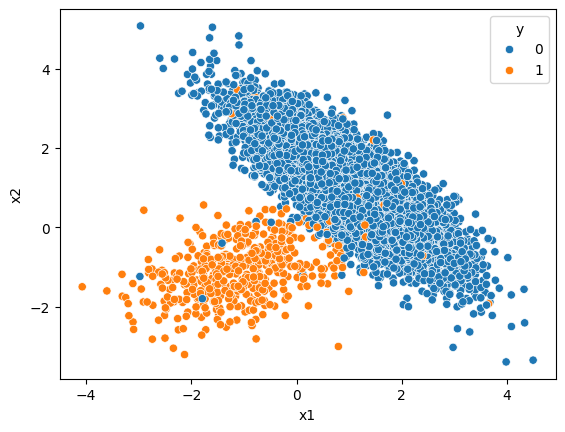

In [42]:

sns.scatterplot(data = X,x=X['x1'], y=X['x2'],hue='y')
plt.show()

* This dataset is totally imbalansed, because one class in 99% whereas another class is in 1%

In [39]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=30)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(7000, 2) (3000, 2) (7000,) (3000,)


## Hyperparameter Tunning

In [45]:
model = LogisticRegression()
c_values=[1,10,100,0.1,0.01,0.001,1000]
solver = ['lbfgs','liblinear','newton-cg','newton-cholesky','sag','saga']
penalty = ['l1','l2','elasticnet']
class_weights = [{0:w,1:y} for w in [1,10,50,100] for y in [1,10,50,100]]

In [49]:
params = dict(penalty = penalty,solver=solver,class_weight = class_weights,C=c_values)


In [54]:
grid = GridSearchCV(estimator=model,param_grid=params,cv=StratifiedKFold())
grid

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid={'C': [1, 10, 100, 0.1, 0.01, 0.001, 1000],
                         'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10},
                                          {0: 1, 1: 50}, {0: 1, 1: 100},
                                          {0: 10, 1: 1}, {0: 10, 1: 10},
                                          {0: 10, 1: 50}, {0: 10, 1: 100},
                                          {0: 50, 1: 1}, {0: 50, 1: 10},
                                          {0: 50, 1: 50}, {0: 50, 1: 100},
                                          {0: 100, 1: 1}, {0: 100, 1: 10},
                                          {0: 100, 1: 50}, {0: 100, 1: 100}],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']})

In [58]:
grid.fit(x_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid={'C': [1, 10, 100, 0.1, 0.01, 0.001, 1000],
                         'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10},
                                          {0: 1, 1: 50}, {0: 1, 1: 100},
                                          {0: 10, 1: 1}, {0: 10, 1: 10},
                                          {0: 10, 1: 50}, {0: 10, 1: 100},
                                          {0: 50, 1: 1}, {0: 50, 1: 10},
                                          {0: 50, 1: 50}, {0: 50, 1: 100},
                                          {0: 100, 1: 1}, {0: 100, 1: 10},
                                          {0: 100, 1: 50}, {0: 100, 1: 100}],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']})

In [59]:
grid.best_params_

{'C': 1,
 'class_weight': {0: 50, 1: 100},
 'penalty': 'l1',
 'solver': 'liblinear'}

In [60]:
y_pred = grid.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [64]:
print("accuracy score : ",accuracy_score(y_test,y_pred))
print()
print("confusion matrix : ",confusion_matrix(y_test,y_pred))
print()
print("classification report : ",classification_report(y_test,y_pred))

accuracy score :  0.9866666666666667

confusion matrix :  [[2828    6]
 [  34  132]]

classification report :                precision    recall  f1-score   support

           0       0.99      1.00      0.99      2834
           1       0.96      0.80      0.87       166

    accuracy                           0.99      3000
   macro avg       0.97      0.90      0.93      3000
weighted avg       0.99      0.99      0.99      3000



In [65]:
y_train_pred = grid.predict(x_train)
y_train_pred

array([0, 0, 0, ..., 0, 0, 0])

In [66]:
print("accuracy score : ",accuracy_score(y_train,y_train_pred ))
print()
print("confusion matrix : ",confusion_matrix(y_train,y_train_pred ))
print()
print("classification report : ",classification_report(y_train,y_train_pred ))

accuracy score :  0.9904285714285714

confusion matrix :  [[6610    6]
 [  61  323]]

classification report :                precision    recall  f1-score   support

           0       0.99      1.00      0.99      6616
           1       0.98      0.84      0.91       384

    accuracy                           0.99      7000
   macro avg       0.99      0.92      0.95      7000
weighted avg       0.99      0.99      0.99      7000

